##### MATH5271 Environmental Data Science and Statistics



## Week 6: Principal Component Analysis

##### Welcome to Week 6 of MATH5271. In this session we will explore Discrimination, Classification and Cluster Analysis. By the end of this session you should understand:

- Ways to discriminate different groups of data points within a multi-variable data set (Discrimination);
- Methods of classification of data points into different groups;
- Cluster analysis methods for the identification of emergent groupings;
- Applications of discrimination, classification and cluster analysis approaches in Environmental Data Sciences.


## Why..

## Setup and Load Data

Before we get started analysing some data we need to ensure we have the appropriate 'libraries' installed. You can think of these as opening a box of available tools. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) package to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. 

In this lab we will also use xarray which is an extremely powerful and user friendly tool for analysis of large multi-dimensional data sets. Here is a more in depth [tutorial](http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html) just on xarray that I have built the second half of this lab from.

There are many other packages and libraries available freely in python. We will experiment with a few in this course but will only really scratch the surface. I will try to keep things as simple as possible so we can focus on understanding - rather than trouble shooting technical issues.

In [2]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline

The first data set we look at will be example data table 14.1 from Wilks, which contains mean temperature and precipitation data for various US cities.

We will load the data table as a pandas 'DataFrame'. This is a 2-dimensional data structure that can store data of different types and has inbuilt operations (like calculating statistics and doing basic plots).

In [3]:
# Define the URL where the data set is stored
dfurl='https://raw.githubusercontent.com/janzika/MATH5271/main/WilksTable13.1.csv'

# Import the data set as a Pandas Dataframe using the 'read_csv' function
df1 = pd.read_csv(dfurl)

# Split into Southeast
x1 = np.array([df1[df1['sym'].isin(['o'])].Temp, df1[df1['sym'].isin(['o'])].Ppt])
# Central
x2 = np.array([df1[df1['sym'].isin(['x'])].Temp, df1[df1['sym'].isin(['x'])].Ppt])
# and Northeast US regions
x3 = np.array([df1[df1['sym'].isin(['+'])].Temp, df1[df1['sym'].isin(['+'])].Ppt])

## 1. Discrimination

Consider the following pre-classified multi-variate data. How would you discriminate between the southeast and central US.

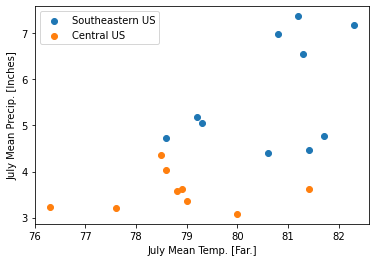

In [4]:
plt.scatter(x1[0,:],x1[1,:],label = 'Southeastern US')
plt.scatter(x2[0,:],x2[1,:],label = 'Central US')
plt.xlabel('July Mean Temp. [Far.]');
plt.ylabel('July Mean Precip. [Inches]')
plt.legend()

## Fisher's Linear Discriminant

In order to derive Fisher's Discriminant we need to know a few things about the data first. Obviously the mean's and centroid of each group but also their covariance matricies ($S_1$,$S_2$,$S_3$). 

We also need to calculate what is called the common covariance matrix 

$$ S_{pool} = \frac{n_1-1}{n_1+n_2-2}S_1 + \frac{n_2-1}{n_1+n_2-2}S_2.$$

In [5]:
# Mean of the Southeast and Central data
x1mean = np.mean(x1,axis=1)
x2mean = np.mean(x2,axis=1)
x3mean = np.mean(x3,axis=1)
# Covariance of the Southeast, Central and Northeastern data
S1 = np.cov(x1)
S2 = np.cov(x2)
S3 = np.cov(x3)
# Number of locations
n1 = x1.shape[1]
n2 = x2.shape[1]
n3 = x3.shape[1]
#Pooled Covariance (weighted average of two)
Spool = ((n1-1)/(n1+n2-2))*S1 + ((n2-1)/(n1+n2-2))*S2

## Fisher's Linear Discriminant

According to Fisher's theory, assuming the covariance matricies are equal for the two groups the maximum difference in means between the two groups is acheived by discriminating the data in the direction 

$$ {\bf a} = [S_{pool}]^{-1}(\overline{\bf x}_1 - \overline{\bf x}_2). $$

Let's plot the centroids and this 'discriminant vector' $\bf a$ on the original data.

Text(0, 0.5, 'July Mean Precip. [Inches]')

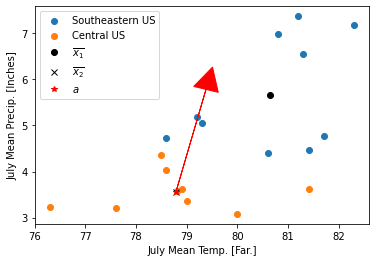

In [6]:
#Discriminant vector
a = np.matmul(np.linalg.inv(Spool),(x1mean - x2mean))
# Plot
plt.scatter(x1[0,:],x1[1,:],label = 'Southeastern US')
plt.scatter(x2[0,:],x2[1,:],label = 'Central US')
# Plot means
plt.plot(x1mean[0],x1mean[1],'ok',label = '$\overline{x_1}$')
plt.plot(x2mean[0],x2mean[1],'xk',label = '$\overline{x_2}$')
# There is no real reason why I started the a vector at x1mean...
plt.plot(x2mean[0],x2mean[1],'*r',label = '$a$')
plt.arrow(x2mean[0],x2mean[1],a[0],a[1],\
          head_width=0.5,head_length=0.5, fc='r', ec='r')
plt.legend()
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')

## Fisher's Linear Discriminant

Now that we have a direction to do our discrimination with we can now actually compute the 'Fisher's Linear Discriminant' which is a single variable with which we can discriminate between each data point $\bf x$ in terms of its group

$$\delta_1({\bf x}) = {\bf a}^T {\bf x}.$$

Let's colour our data points using this discriminant. 

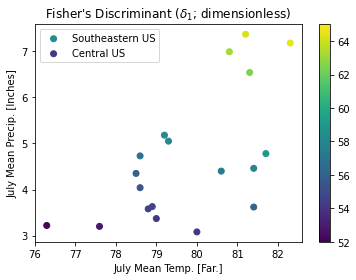

In [7]:
#Fisher's linear discriminant for the two groups
d1_1 = np.matmul(np.transpose(a),x1)
d1_2 = np.matmul(np.transpose(a),x2)
#Plot histograms (with many bins) and label where m is
plt.scatter(x1[0,:],x1[1,:],c=d1_1, vmin=52, vmax=65,label = 'Southeastern US')
plt.scatter(x2[0,:],x2[1,:],c=d1_2, vmin=52, vmax=65,label = 'Central US')
plt.title('Fisher\'s Discriminant ($\delta_1$; dimensionless)')
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')
plt.legend();plt.colorbar()

## Discrimination using Fisher's Linear Discriminant

Finally, we can set the mid point between the $\delta_1(\overline{\bf x}_1)$ and $\delta_1(\overline{\bf x}_2)$ as our line of discrimination $\hat{m}$. That is

$$ \hat{m} = \frac{1}{2}({\bf a}^T \overline{\bf x}_1-{\bf a}^T \overline{\bf x}_2)$$

Let's looks at how our data is distributed along $\delta_1$ and where $\hat{m}$ sits. 

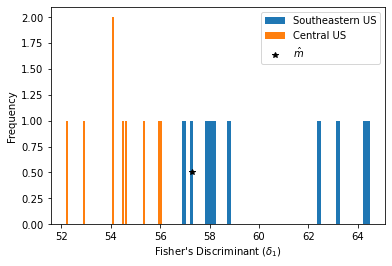

In [8]:
#midpoint between groups
m = 0.5*(np.matmul(np.transpose(a),x1mean)+np.matmul(np.transpose(a),x2mean))
#Plot histograms (with many bins) and label where m is
plt.hist(d1_1,50,label = 'Southeastern US')
plt.hist(d1_2,50,label = 'Central US')
plt.plot(m,0.5,'*k',label = '$\hat{m}$')
plt.xlabel('Fisher\'s Discriminant ($\delta_1$)')
plt.ylabel('Frequency')
plt.legend()

## Classification using Fisher's Linear Discriminant

We can use Fisher's linear discriminant as to classify new data $\bf y$ such that if $\delta_1({\bf y})>\hat{m}$ the new data is classified as Southeastern and Central otherwise. Furthermore multiple linear thresholds can be defined for multiple (>2) groups.

However, as we have seen, this method of discrimination isn't perfect since 1 point (Atlanta). In a way this highlights the fact that using only the mean and pooled covariance can only take you so far. Also a probabilistic approach is typically required, so that we can give the probability of classification rather than a definitive classification. This can be done using Fisher's theory (see Wilks) but we will discuss MVN approaches here.

### 2. Classification using Probabilistic Distributions

Let us take a slightly different tack now and ask what is the probability that a city with a mean temperature of 74.7$^{\circ}$F and a mean accumulated rainfall of 33.37 inches belongs to one of our three groups. This is *classification*. 

We could use the same approach as above, calculating lines dividing the 2D space. Instead we will use Multi-variate normal distributions.

Firstly let's plot all 3 group's and see where ${\bf x}_0 =$[74.7$^{\circ}$F, 33.37in.]$^T$ sits

Text(0, 0.5, 'July Mean Precip. [Inches]')

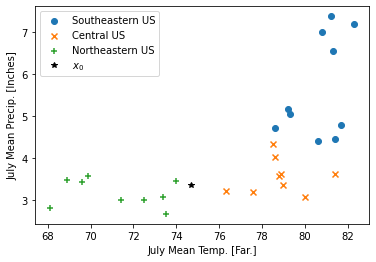

In [9]:
plt.scatter(x1[0,:],x1[1,:],label = 'Southeastern US')
plt.scatter(x2[0,:],x2[1,:],marker = 'x',label = 'Central US')
plt.scatter(x3[0,:],x3[1,:],marker = '+',label = 'Northeastern US')
plt.plot(74.7,3.37,'*k',label = '$x_0$');plt.legend()
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')

## Bayes Theorem

Many of you will have come across Bayes Theorem, which states that the probability of $A$ given $B$ ($Pr(A | B)$) is given

$$ Pr \{ A \,|\, B \} = \frac{ Pr( B | A) Pr(A)}{Pr(B)}. $$

Framed in terms of classification where $A$ is one of the groups (from 1 to G) and $B$ is the location of a data point in parameter space ${\bf x}$ we have 

$$ Pr \{ \text{Group g} \,|\, {\bf x}_0 \} 
= \frac{ Pr( {\bf x}_0 | \text{Group g}) Pr(\text{Group g})}{Pr({\bf x}_0)}
= \frac{ f_g({\bf x}_0) P_g}{\sum_{h=1}^G f_h({\bf x}_0) P_h} $$

and we have simplified $Pr( {\bf x}_0 | \text{Group h})=f_h({\bf x}_0)$ and $Pr(\text{Group g})=p_h$. 

We need only develop a probabilistic model for each group $f_h$.

## Multi-variate normal (MVN) models for each group

One way to model each group is to describe it as a distinct multi-variate Gaussian distribution. This means the probability distribution function of group $g$ is given by

$$f_g(x) \, \propto \, \frac{1}{\sqrt{\det(S_g)}}\exp\left[-\frac{1}{2}({\bf x_g} - \overline{\bf x_g})^T [S_g]^{-1} ({\bf x_g} - \overline{\bf x_g}) \right].$$ 

Wilk's uses $S_{pool}$ for all three distributions but I am going to use their own covariance matrices $S_g$. 

We can define a grid of temperature and precipitation anomaly values and map what these distributions look like.

In [10]:
# Define range of temp. and precip. anomaly values
T = np.linspace(-5,5,20) ; P = np.linspace(-5,5,20)
# Create 2D arrays 
Tmesh, Pmesh = np.meshgrid(T, P)
# Pre-allocate 3 PDFs 
f = np.zeros([3,Tmesh.shape[0],Tmesh.shape[1]]);
# Compute denominator of each PDF 
S = [S1,S2,S3]
# Loop through each point in grid
for h in np.arange(0,3):
 for i in np.arange(0,P.shape[0]):
  for j in np.arange(0,T.shape[0]):
    #Compute f = exp ( - 0.5 * x^T Sg^-1 x ) / sqrt(det(Sg))
    f[h,j,i]= np.exp(-0.5* \
              np.dot(\
              np.array([T[i],P[j]]),\
              np.matmul(np.linalg.inv(S[h]), \
              np.array([T[i],P[j]])))) \
              / \
              np.sqrt(np.linalg.det(S[h]))

Text(0, 0.5, 'July Mean Precip. [Inches]')

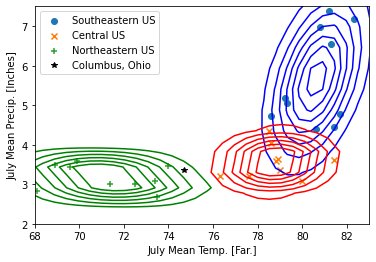

In [11]:
# Shift so centred on mean and plot contours
plt.contour(T+x1mean[0],P+x1mean[1],f[0],colors='b')
plt.contour(T+x2mean[0],P+x2mean[1],f[1],colors='r')
plt.contour(T+x3mean[0],P+x3mean[1],f[2],colors='g')
# Show original data
plt.scatter(x1[0,:],x1[1,:],label = 'Southeastern US')
plt.scatter(x2[0,:],x2[1,:],marker = 'x',label = 'Central US')
plt.scatter(x3[0,:],x3[1,:],marker = '+',label = 'Northeastern US')
plt.plot(74.7,3.37,'*k',label = 'Columbus, Ohio')
# Set limits and labels
plt.legend(); plt.axis([68,83,2,7.5])
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')

## Calculating Probabilities

We can now calculate the chance that Columbus Ohio is in the different groups based on the MVN model.

In [12]:
x0 = np.array([74.7,3.37]); fx0 = [0,0,0]; xmean = [x1mean,x2mean,x3mean];
# Calculate fg(x0) (or at least something proportional to it)
for h in np.arange(0,3):
    fx0[h] = np.exp(-0.5*np.dot(np.array(x0-xmean[h]),\
          np.matmul(np.linalg.inv(S[h]),np.array(x0-xmean[h]))))\
          /np.sqrt(np.linalg.det(S[h]))
# Now apply Bayes' theorem.
Pgx0 =  fx0/(np.sum(fx0))
print('Percent probability of being in each group=',np.round(100*Pgx0,2))

Percent probability of being in each group= [ 0.    9.29 90.71]


Models to discriminate between groups and classify new data points can be developed using both Fisher's Linear Discriminant and Gaussian (or other distribution) based methods. As in other *supervised* learning techniques, the classification algorithms are developed based on labeled training data.

But what about when you don't *a priori* have classifications in mind for different groups. This challenge calls for our second *unsupervised* statistical learning technique: cluster analysis. 

# Cluster Analysis

Let's take a clean slate and look at the US city data again, but now, without any pre-defined groups in mind. Our aim now is to cluster these data point into groups, not according to *a priori* information such as the region they are from but based on the data themselves. Using *Cluster Analysis* we will find which data points are closest together and form groups with the smallest distance between points. Before we discuss clustering though, we must first think about what we mean by 'distance'.

Text(0, 0.5, 'July Mean Precip. [Inches]')

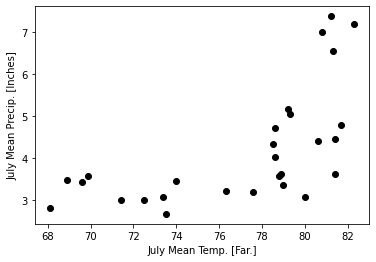

In [13]:
plt.scatter(df1.Temp,df1.Ppt,color='k')
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')

## What is Distance?

Looking again at the data but highlighting Springfield and St Louis specifically, we can all agree these two points are close. But what defines closeness here. 

Text(0, 0.5, 'July Mean Precip. [Inches]')

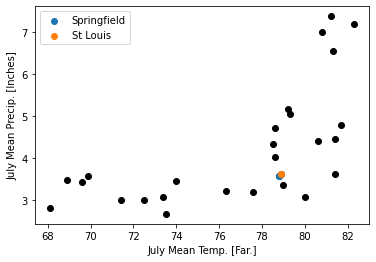

In [14]:
plt.scatter(df1.Temp,df1.Ppt,color='k')
plt.scatter(df1.Temp[15],df1.Ppt[15],label = 'Springfield')
plt.scatter(df1.Temp[16],df1.Ppt[16],label = 'St Louis')
plt.legend()
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')

## What is Distance?

The most basic choice is to think of the x and y axes as coordinates in physical space and then take the *euclidean* distance between data points $i$ and $j$ as

$$ d_{i,j} = \left[\sum_{k=1}^K(x_{i,k}-x_{j,k})^2\right]^{1/2}$$

where there are $K$ different variables (in the US cities case K=2).

But what would happen if we measured temperature in millikelvin and precipitation in kilometres? Would this affect the relative distances 

## Metrics

Distance measures are called metrics and must have a number of properties such as they must satisfy the triangle inequality (basically the distance from A to B can't be made shorter by going via a third point C).

A common choice is the Normalised Euclidean or Karl Pearson distance

$$ d_{i,j} = \left[\sum_{k=1}^K w_k (x_{i,k}-x_{j,k})^2\right]^{1/2}\,\,w_k = 1/s_{k,k}.$$

This can be generalised as what is called the Minkowski distance

$$ d_{i,j} = \left[\sum_{k=1}^K w_k |x_{i,k}-x_{j,k}|^{\lambda}\right]^{1/\lambda}\,\,\lambda \geq 1.$$



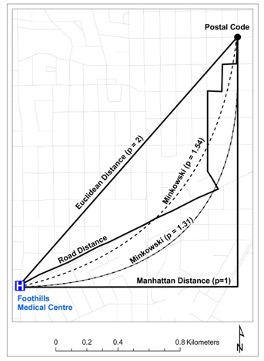
Shahid, R., Bertazzon, S., Knudtson, M.L. et al. [Comparison of distance measures in spatial analytical modeling for health service planning](https://doi.org/10.1186/1472-6963-9-200). BMC Health Serv Res 9, 200 (2009). 


## Mahalanobis and the revisiting Fisher

Perhaps the most powerful distance metric, with links to ideas from the PCA chapter, is the Mahalanobis distance

$$ d_{i,j}^2 = [{\bf x}_i - {\bf x}_j]^T [S]^{-1} [{\bf x}_i - {\bf x}_j].$$

This metric considers the directions in which the data varies in order determine the distance. In fact the direction of Fisher's linear discriminant is that which minimises the Mahalanobis distance.

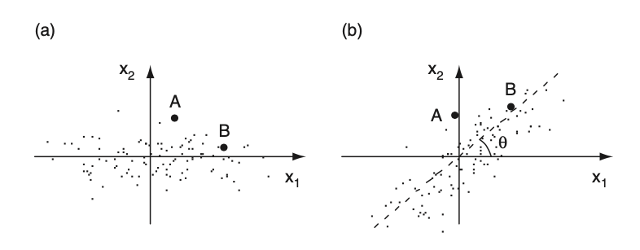

In [27]:
# Create anomaly field
x = np.array([(df1.Temp-df1.Temp.mean())/df1.Temp.std(),(df1.Ppt-df1.Ppt.mean())/df1.Ppt.std()])
# Number of data points
N=x.shape[1]
# Pre-allocate distance matrix
d2mat = np.zeros([N,N])+np.nan
# Loop through each pair 
for i in np.arange(N):
    for j in np.arange(i): #stopping at i we avoid i,i caserepetition
       d2mat[i,j] = np.linalg.norm(x[:,i]-x[:,j])
close_ind = np.where(d2 == np.nanmin(d2mat))

## Hierarchical Clustering

Springfield and St Louis are the closest two points (smallest Pearson distance). We have gone from 27 cities to 26 'clusters'. What now?

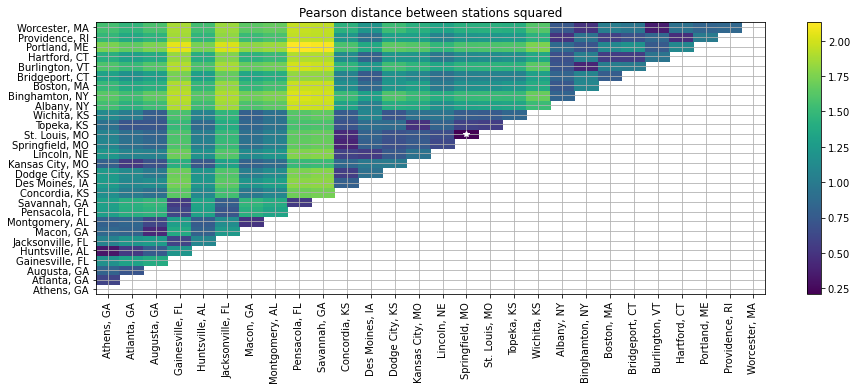

In [33]:
# Find the index of the closest pair     
plt.pcolor(np.sqrt(d2mat))
plt.plot(close_ind[1]+0.5,close_ind[0]+0.5,'*w')
plt.colorbar()
plt.xticks(np.arange(0,N)+0.5,df1.Station,rotation=90)
plt.yticks(np.arange(0,N)+0.5,df1.Station)
plt.title('Pearson distance between stations squared')
plt.grid()

## Linkages



## Linkage Game


## Simple Clustering Algorithm

We can now agglomerate the closest two. Then define those as a new data point and look for the next nearest. And so on. Here is an algorithm using the 'Centroid' Method. I.e. where groups are linked according to the smallest distance between centroids

$$ d_{G_1,G_2} = || \overline{\bf x}_{G_1} - \overline{\bf x}_{G_2} ||.$$

In [16]:
whichgroup = np.tile(np.arange(0,N),(N,1))
diststep = np.zeros([N,1])

for k in np.arange(1,N):
  d2 = np.zeros([N,N])+np.nan
  for i in np.unique(whichgroup[k-1,:]):     
      for j in np.unique(whichgroup[k-1,whichgroup[k-1,:]<(i)]):
          igroup = np.mean(x[:,whichgroup[k,:]==i],axis = 1)
          jgroup = np.mean(x[:,whichgroup[k,:]==j],axis = 1)
          d2[i,j] = np.linalg.norm(igroup-jgroup)
  diststep[k]=np.nanmin(d2)
  close_ind = np.where(d2 == diststep[k])     
  whichgroup[k,:]=whichgroup[k-1,:]
  whichgroup[k,whichgroup[k-1,:]==close_ind[0]]=whichgroup[k-1,close_ind[1]]

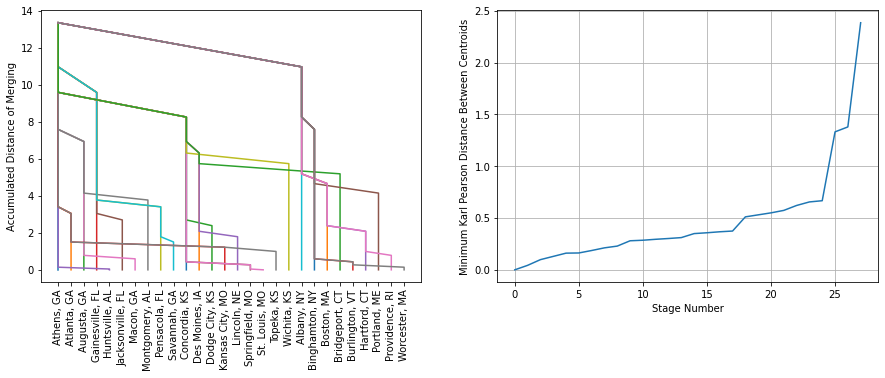

In [21]:
plt.rcParams['figure.figsize'] = [15, 5]

plt.subplot(1,2,1)
plt.plot(whichgroup,np.cumsum(diststep))
plt.xticks(np.arange(0,N),df1.Station,rotation=90)
plt.ylabel('Accumulated Distance of Merging')

plt.subplot(1,2,2)
plt.plot(diststep)
plt.ylabel('Minimum Karl Pearson Distance Between Centroids')
plt.xlabel('Stage Number')
plt.grid()

Text(0.5, 0, 'Stage Number')

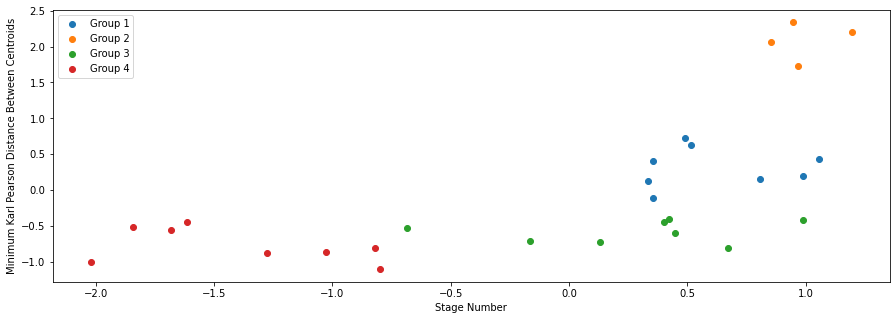

In [19]:
stage = 24
count=1
for i in np.unique(whichgroup[stage,:]):
  plt.scatter(x[0,whichgroup[stage,:]==i],x[1,whichgroup[stage,:]==i],\
              label='Group '+str(count))
  count=count+1
plt.legend()
plt.ylabel('Minimum Karl Pearson Distance Between Centroids')
plt.xlabel('Stage Number')

## Non-hierarchical Method

K-means

GMM

## Applications

# Summary

- Principal Component Analysis involves taking multivariate data and reprojecting it to form PCs ordered from most to least important; 
- PCA is an efficient form of data compression and is an *unsupervised* learning technique since PCs are not prescribed *a priori*;
- PCs (also known as Empirical Orthogonal Functions) are a mainstay of geoscience - but they should be interpreted with caution.